We are importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Preprocessing and Data Cleaning

Retrieve the datasets for both IMDB and Netflix

In [54]:
imdb = pd.read_csv('IMDBmovies.csv')
netflix = pd.read_csv('netflix_titles.csv')

/var/folders/yf/mvjs6sv57jv92mt1v15d2msr0000gn/T/ipykernel_18266/3106195283.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb = pd.read_csv('IMDBmovies.csv')


In [55]:

IMDBmovies_data = imdb.copy()
IMDBmovies_data.shape

(85855, 22)

In [56]:
IMDBmovies_data.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN
85854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,"Maria Morera Colomer, Biel Rossell Pelfort, Is...","Pep, a 13-year-old boy, is in love with a girl...",6.7,102,NaN,NaN,$ 59794,NaN,NaN,2.0


In [57]:

netflix_data = netflix.copy()
netflix_data.shape

(8807, 12)

In [58]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


Merging the IMDB Movies dataset with the Netflix dataset using their movie titles.

In [59]:
combined_data = pd.merge(left=IMDBmovies_data, right=netflix_data, left_on='title', right_on='title')
combined_data.shape

(2960, 33)

In [60]:
combined_data.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration_x,country_x,language,director_x,...,type,director_y,cast,country_y,date_added,release_year,rating,duration_y,listed_in,description_y
0,tt0007338,Sherlock Holmes,Sherlock Holmes,1916,1916-05-15,Mystery,116,USA,English,Arthur Berthelet,...,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
1,tt0013597,Sherlock Holmes,Sherlock Holmes,1922,1922-03-07,"Drama, Mystery",85,USA,English,Albert Parker,...,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
2,tt0023460,Sherlock Holmes,Sherlock Holmes,1932,1932-11-06,Drama,68,USA,English,William K. Howard,...,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
3,tt0029210,Sherlock Holmes,"Der Mann, der Sherlock Holmes war",1937,1937-07-15,"Comedy, Crime, Romance",116,Germany,German,Karl Hartl,...,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
4,tt0988045,Sherlock Holmes,Sherlock Holmes,2009,2009-12-25,"Action, Adventure, Mystery",128,"USA, Germany, UK, Australia","English, French",Guy Ritchie,...,Movie,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",2009,PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...


- __Drop Duplicate Values:__

We need to drop the duplicate movie titles in the dataset. 

In [61]:
combined_data.drop_duplicates(subset="title", keep='first', inplace=True)


In [62]:
sum(combined_data.duplicated(['title']))

0

- __Remove the NA values from dataset__

In [63]:
combined_data.isnull().sum().sum()

6763

There are total 6763 NA values in the dataset

In [64]:
combined_data.isnull().sum()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration_x                  0
country_x                   5
language                   27
director_x                  0
writer                     50
production_company         89
actors                      0
description_x              11
avg_vote                    0
votes                       0
budget                   1577
usa_gross_income         1655
worlwide_gross_income    1154
metascore                1613
reviews_from_users         59
reviews_from_critics      205
show_id                     0
type                        0
director_y                222
cast                       39
country_y                  55
date_added                  1
release_year                0
rating                      1
duration_y                  0
listed_in                   0
description_y               0
dtype: int

If there are more than 600 null values, drop them

In [65]:
dn = combined_data.loc[:,(combined_data.isna().sum()>800)].columns.tolist()
dn

['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore']

In [66]:
combined_data.country_x.fillna("Unavailable Country", inplace=True)
combined_data.cast.fillna("no cast", inplace=True)
combined_data.description_x.fillna("No Description", inplace=True)
combined_data.budget.fillna("No Budget", inplace=True)
combined_data.rating.fillna("No Rating", inplace=True)
combined_data.dropna(subset=["avg_vote","language"], inplace=True)
combined_data.isnull().sum()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration_x                  0
country_x                   0
language                    0
director_x                  0
writer                     50
production_company         87
actors                      0
description_x               0
avg_vote                    0
votes                       0
budget                      0
usa_gross_income         1629
worlwide_gross_income    1130
metascore                1588
reviews_from_users         58
reviews_from_critics      199
show_id                     0
type                        0
director_y                217
cast                        0
country_y                  52
date_added                  1
release_year                0
rating                      0
duration_y                  0
listed_in                   0
description_y               0
dtype: int

drop the repeated columns ,the columns we will not use and the most missing valued columns.

In [67]:
combined_data.drop(["original_title","date_added","year","actors","show_id","writer","usa_gross_income","worlwide_gross_income","metascore","reviews_from_users","reviews_from_critics","production_company","date_published","genre","director_y", "country_y","duration_y","description_y"], axis=1,inplace=True)
combined_data.tail()

,imdb_title_id,title,duration_x,country_x,language,director_x,description_x,avg_vote,votes,budget,type,cast,release_year,rating,listed_in
2955,tt9817760,Jai Mummy Di,103,India,Hindi,Navjot Gulati,Jai Mummy Di is a light-hearted family comedy ...,3.6,661,No Budget,Movie,"Poonam Dhillon, Supriya Pathak, Sunny Singh, S...",2020,TV-MA,"Comedies, International Movies, Romantic Movies"
2956,tt9850064,Children of the Sea,111,Japan,Japanese,Ayumu Watanabe,A young girl is drawn into a mystery involving...,6.5,1148,No Budget,Movie,"Mana Ashida, Hiiro Ishibashi, Seishu Uragami, ...",2019,TV-PG,"Anime Features, International Movies"
2957,tt9866700,Paranormal Investigation,92,France,French,Franck Phelizon,When a young man becomes possessed after playi...,3.7,1299,No Budget,Movie,"Andrei Indreies, Jean-Baptiste Heuet, Jose Atu...",2018,TV-14,"Horror Movies, International Movies, Thrillers"
2958,tt9887580,Bulletproof 2,97,USA,English,Don Michael Paul,"Set 25 years after, Jack is now working as a S...",3.5,326,No Budget,Movie,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",2020,TV-MA,"Action & Adventure, Comedies"
2959,tt9898858,Coffee & Kareem,88,USA,English,Michael Dowse,Twelve-year-old Kareem Manning hires a crimina...,5.1,10627,No Budget,Movie,"Ed Helms, Taraji P. Henson, Terrence Little Ga...",2020,TV-MA,"Action & Adventure, Comedies"


- __Renaming the Columns:__

In [68]:
combined_data.rename(columns={"imdb_title_id":"IMDB_Title_ID","title":"Movie_Title","release_year":"Year","listed_in":"Genre","duration_x":"Duration","country_x": "Country","language":"Language","director_x" : "Director", "description_x":"Description","avg_vote":"IMDB_Rating","votes":"Votes","budget":"Budget","type":"Type","cast":"Cast","rating":"Rating"}, inplace=True)
combined_data.tail()

,IMDB_Title_ID,Movie_Title,Duration,Country,Language,Director,Description,IMDB_Rating,Votes,Budget,Type,Cast,Year,Rating,Genre
2955,tt9817760,Jai Mummy Di,103,India,Hindi,Navjot Gulati,Jai Mummy Di is a light-hearted family comedy ...,3.6,661,No Budget,Movie,"Poonam Dhillon, Supriya Pathak, Sunny Singh, S...",2020,TV-MA,"Comedies, International Movies, Romantic Movies"
2956,tt9850064,Children of the Sea,111,Japan,Japanese,Ayumu Watanabe,A young girl is drawn into a mystery involving...,6.5,1148,No Budget,Movie,"Mana Ashida, Hiiro Ishibashi, Seishu Uragami, ...",2019,TV-PG,"Anime Features, International Movies"
2957,tt9866700,Paranormal Investigation,92,France,French,Franck Phelizon,When a young man becomes possessed after playi...,3.7,1299,No Budget,Movie,"Andrei Indreies, Jean-Baptiste Heuet, Jose Atu...",2018,TV-14,"Horror Movies, International Movies, Thrillers"
2958,tt9887580,Bulletproof 2,97,USA,English,Don Michael Paul,"Set 25 years after, Jack is now working as a S...",3.5,326,No Budget,Movie,"Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...",2020,TV-MA,"Action & Adventure, Comedies"
2959,tt9898858,Coffee & Kareem,88,USA,English,Michael Dowse,Twelve-year-old Kareem Manning hires a crimina...,5.1,10627,No Budget,Movie,"Ed Helms, Taraji P. Henson, Terrence Little Ga...",2020,TV-MA,"Action & Adventure, Comedies"


In [69]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 0 to 2959
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Title_ID  2349 non-null   object 
 1   Movie_Title    2349 non-null   object 
 2   Duration       2349 non-null   int64  
 3   Country        2349 non-null   object 
 4   Language       2349 non-null   object 
 5   Director       2349 non-null   object 
 6   Description    2349 non-null   object 
 7   IMDB_Rating    2349 non-null   float64
 8   Votes          2349 non-null   int64  
 9   Budget         2349 non-null   object 
 10  Type           2349 non-null   object 
 11  Cast           2349 non-null   object 
 12  Year           2349 non-null   int64  
 13  Rating         2349 non-null   object 
 14  Genre          2349 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 293.6+ KB


In [70]:
combined_data.columns

Index(['IMDB_Title_ID', 'Movie_Title', 'Duration', 'Country', 'Language',
       'Director', 'Description', 'IMDB_Rating', 'Votes', 'Budget', 'Type',
       'Cast', 'Year', 'Rating', 'Genre'],
      dtype='object')

# Data Visualization(EDA)

In [71]:
TV_shows = combined_data[combined_data['Type']=='TV Show'].sort_values(by='IMDB_Rating',ascending=False)
TV_shows[['Movie_Title','IMDB_Rating']].head(10)

,Movie_Title,IMDB_Rating
160,Persona,8.1
802,My Sassy Girl,8.0
939,Trailer Park Boys,7.9
145,Spartacus,7.9
1037,Mind Game,7.8
881,Ray,7.7
2020,1983,7.7
128,Godzilla,7.6
486,Leila,7.6
632,After Life,7.6


In [72]:
movies = combined_data[combined_data['Type']=='Movie'].sort_values(by='IMDB_Rating',ascending=False)
movies[['Movie_Title','IMDB_Rating']].head(10)

,Movie_Title,IMDB_Rating
421,Schindler's List,8.9
441,Pulp Fiction,8.9
1442,Inception,8.8
826,City of God,8.6
469,Seven,8.6
693,Koshish,8.6
240,Gol Maal,8.6
1233,Oththa Seruppu Size 7,8.6
2161,Eh Janam Tumhare Lekhe,8.6
2886,Ani... Dr. Kashinath Ghanekar,8.6


In our dataset, we have ratings indicating the appropriateness of content for various age groups. Content rated below 7 is considered suitable for "Older Kids," while content suitable for ages 7 and above is categorized as "Teens." For an audience aged 17 and older, the content is labeled as "Adults." Additionally, there are entries marked as "Not Rated."

In [73]:
combined_data.Rating.unique()

array(['PG-13', 'PG', 'TV-MA', 'R', 'TV-Y7', 'TV-14', 'TV-PG', 'G',
       'TV-Y', 'NR', 'TV-G', 'NC-17', 'No Rating', 'UR'], dtype=object)

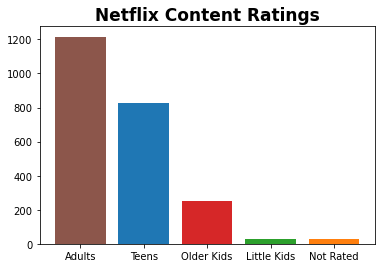

In [87]:
little_kids = combined_data.Rating.value_counts()['TV-Y']+combined_data.Rating.value_counts()['TV-G']+ combined_data.Rating.value_counts()['G']
older_kids= combined_data.Rating.value_counts()['TV-Y7']+combined_data.Rating.value_counts()['TV-PG']+combined_data.Rating.value_counts()['PG']
teens = combined_data.Rating.value_counts()['TV-14']+combined_data.Rating.value_counts()['PG-13']
adults = combined_data.Rating.value_counts()['TV-MA']+combined_data.Rating.value_counts()['R']+combined_data.Rating.value_counts()['NC-17']
not_rated = combined_data.Rating.value_counts()['NR']+combined_data.Rating.value_counts()['UR']+combined_data.Rating.value_counts()['No Rating']

fig, ax = plt.subplots()
bar_labels = ['brown', 'blue', 'red', 'green','orange']
bar_colors = ['tab:brown', 'tab:blue', 'tab:red', 'tab:green','tab:orange']
# Specify the positions of the bars
positions = [0, 1, 2, 3, 4]

# Use the correct parameters: x for positions, height for values
plt.bar(x=positions, height=[adults, teens, older_kids, little_kids, not_rated],label=bar_labels,color=bar_colors)

# Specify the labels for each position
plt.xticks(positions, ['Adults', 'Teens', 'Older Kids', 'Little Kids', 'Not Rated'])

plt.title('Netflix Content Ratings', fontsize=17, weight='bold')
plt.show()



#fig = plt.figure(figsize = (10, 5))
#plt.bar(x=[adults,teens,older_kids,little_kids,not_rated],labels=['Adults','Teens','Older Kids','Little Kids','Not Rated'],color='red',width=0.4)
#plt.title(' Netflix Content Ratings',fontsize=17,weight='bold')
#plt.show()

The data reveals that a significant portion of Netflix's movie and TV show content, approximately 85%, is tailored for audiences aged 13 and above, making it suitable for teens and adults. Specifically, half of the content is geared towards adult viewers, indicating an audience older than 17 years. Another notable proportion, comprising 35%, is targeted at teenagers, which may not be suitable for children below the age of 13. In summary, the majority of Netflix's content caters to teen and adult audiences, highlighting its appeal to older viewers.

###### 

We have a bar graph for distribution of all content's ratings by their counts

In [88]:
from plotly.offline import init_notebook_mode, plot, iplot 
import plotly.graph_objs as go
import plotly.validators.layout

import plotly.graph_objects as go

result = combined_data['IMDB_Rating'].value_counts().sort_index(ascending=False)

# Create a bar chart
bar_chart = go.Figure()




bar_chart.add_trace(
    go.Bar(
        x=result.index,
        y=result.values,
        text=['{:.1f} %'.format(val) for val in (result.values / combined_data.shape[0] * 100)],
        textposition='auto',
        textfont=dict(color='#010203'),
        marker=dict(color=['#ff7c00', '#007bff', '#28a745', '#ffc107', '#dc3545'])  # Change the color list here
    )
)


# Layout settings
layout = dict(
    title='Netflix-Ratings Distribution {}'.format(combined_data.shape[0]),
    xaxis=dict(title='IMDB_Rating'),
    yaxis=dict(title='Count')
)

bar_chart.update_layout(layout)

# Show the figure
bar_chart.show()


The IMDb ratings for the content range from a minimum of 1.6 to a maximum of 8.9 out of 10. Additionally, the majority of IMDb ratings fall within the range of 6 to 7.

__A pie-chart to visualise the distinct Genres distribution and their percentages__

In [89]:
import plotly.graph_objects as go
from collections import Counter

eda_result = combined_data.copy()
sg = ", ".join(eda_result['Genre']).split(", ")
sgc = Counter(sg).most_common(10)

l = [item[0] for item in sgc][::-1]
v= [item[1] for item in sgc][::-1]

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'gold']

genre = go.Figure(data=[go.Pie(labels=l, values=v, textinfo='label', marker=dict(colors=colors))])

genre.update_layout(title="Genre Distribution with Percentage Breakdown")

genre.show()


Dramas, International Movies, Comedies are the top 3 dominant generes with 25%,23%,13% percentages.

__Box plot to analyse the average ratings across different generes__

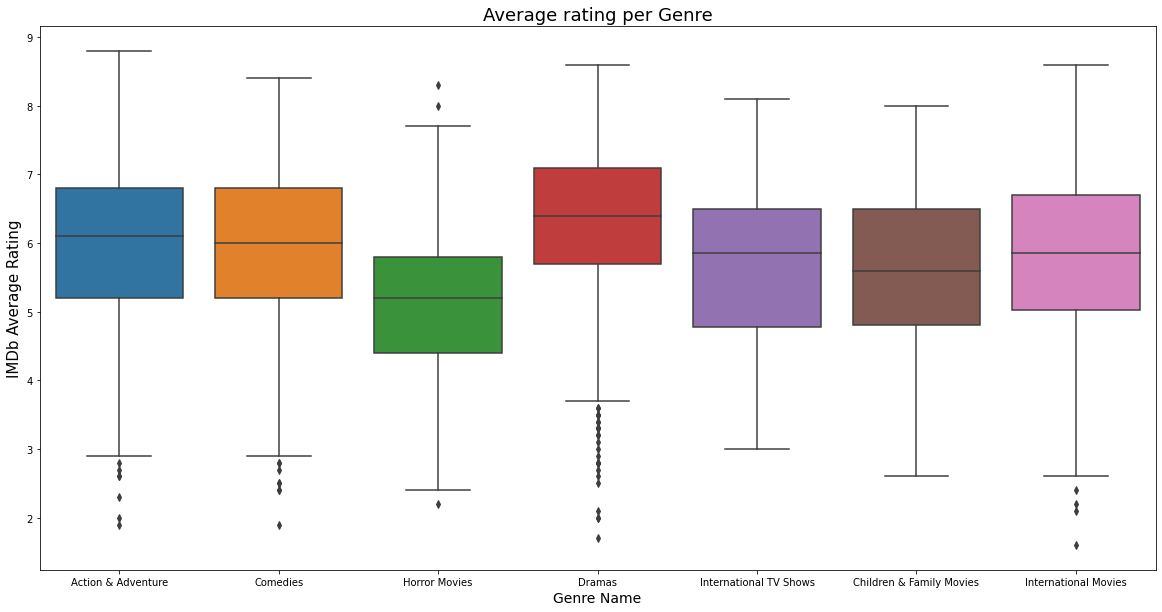

In [90]:
eda_result['first_genre'] = eda_result['Genre'].str.split(',').str[0]
count = eda_result['first_genre'].value_counts()[:7]
top_genre = list(count.index)
genreratingbox = eda_result[eda_result['first_genre'].isin(top_genre)]
genreratingbox = genreratingbox[['first_genre', 'IMDB_Rating', 'Votes']]

plt.figure(figsize=(20, 10))
sns.boxplot(x='first_genre', y='IMDB_Rating', data=genreratingbox)
plt.xlabel("Genre Name",fontsize=14)
plt.ylabel("IMDb Average Rating",fontsize=15)
plt.title("Average rating per Genre", fontsize=18)
plt.show()

Across various genres, the distribution of ratings appears consistent, with most genres averaging around a rating of 6. However, Horror Movies stand out as an exception, displaying a notably lower average rating of approximately 5.

__Shows relation between Duration and Country__

(0.0, 10.0)

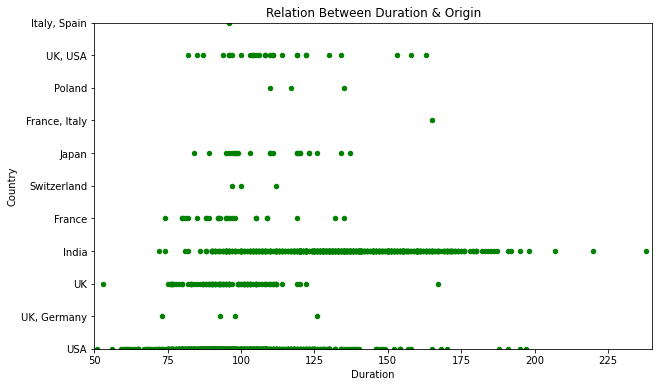

In [91]:
ax = combined_data.plot.scatter(x ='Duration', y ='Country',figsize=(10,6),color='green') 
ax.set_ylabel("Country")
ax.set_xlabel("Duration")
ax.set_title("Relation Between Duration & Origin")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))

Contents with a duration of up to 180 minutes are predominantly from India.

__Scatter plot between Votes and IMDB Ratings__

In [92]:
import plotly.express as px
fig = px.scatter(combined_data,x="Votes" , y="IMDB_Rating", color="Language",
                 size='Votes', hover_data=['Movie_Title'])
fig.show()

__Scatter plot between Duration and IMDB Ratings__

(0.0, 10.0)

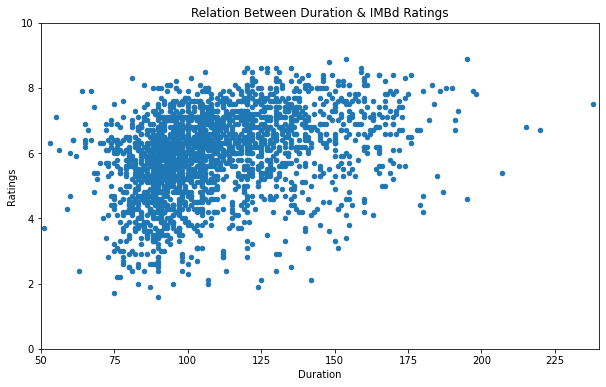

In [93]:
ax = combined_data.plot.scatter(x ='Duration', y ='IMDB_Rating',figsize=(10,6)) 
ax.set_ylabel("Ratings")
ax.set_xlabel("Duration")
ax.set_title("Relation Between Duration & IMBd Ratings")
ax.set_xlim((50, 240))
ax.set_ylim((0, 10))

In [29]:
import plotly.express as px
fig = px.scatter(combined_data,x="Duration" , y="IMDB_Rating", color="Language",
                 size='Duration', hover_data=['Movie_Title'])
fig.show()

The graph indicates that content with a duration between 100-125 minutes tends to receive higher IMDb ratings compared to content with a duration of 75-100 minutes.

__Scatter plot between IMDb Ratings and Country__

(0.0, 10.0)

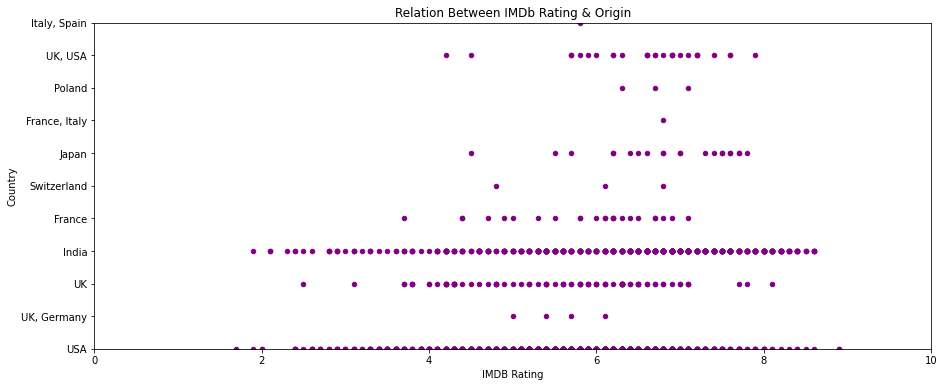

In [94]:
ax = combined_data.plot.scatter(x ='IMDB_Rating', y ='Country',figsize=(15,6),color='purple') 
ax.set_ylabel("Country")
ax.set_xlabel("IMDB Rating")
ax.set_title("Relation Between IMDb Rating & Origin")
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))

The majority of films with IMDb ratings above 8 originate from India and the USA.

# Encoding

We transformed categorical string columns into numerical format for machine learning models using the OrdinalEncoder from the scikit-learn library.

In [95]:
from sklearn.preprocessing import OrdinalEncoder

di = combined_data.copy()
oe = OrdinalEncoder()

di["title_code"] = oe.fit_transform(di[["Movie_Title"]])
di["country_code"] = oe.fit_transform(di[["Country"]])
di["language_code"] = oe.fit_transform(di[["Language"]])
di["director_code"] = oe.fit_transform(di[["Director"]])
di["budget_code"] = oe.fit_transform(di[["Budget"]])
di["type_code"] = oe.fit_transform(di[["Type"]])
di["rating_code"] = oe.fit_transform(di[["Rating"]])
di["genre_code"] = oe.fit_transform(di[["Genre"]])

di.drop(["IMDB_Title_ID","Country","Language","Director","Description","Budget","Type","Cast","Rating","Genre"], axis=1,inplace= True)
di.head()

,Movie_Title,Duration,IMDB_Rating,Votes,Year,title_code,country_code,language_code,director_code,budget_code,type_code,rating_code,genre_code
0,Sherlock Holmes,116,6.4,313,2009,1691.0,268.0,22.0,185.0,288.0,0.0,5.0,10.0
5,Leap Year,56,6.1,268,2010,1065.0,268.0,22.0,752.0,288.0,0.0,4.0,133.0
7,The Trap,60,6.0,118,2017,2105.0,268.0,22.0,1549.0,288.0,0.0,9.0,99.0
14,The Circle,71,6.3,491,2021,1907.0,268.0,22.0,584.0,288.0,1.0,9.0,253.0
18,The Monster,86,6.2,906,2016,2037.0,268.0,22.0,1569.0,288.0,0.0,6.0,200.0


# Correlation

  __Pearson's Correlation__

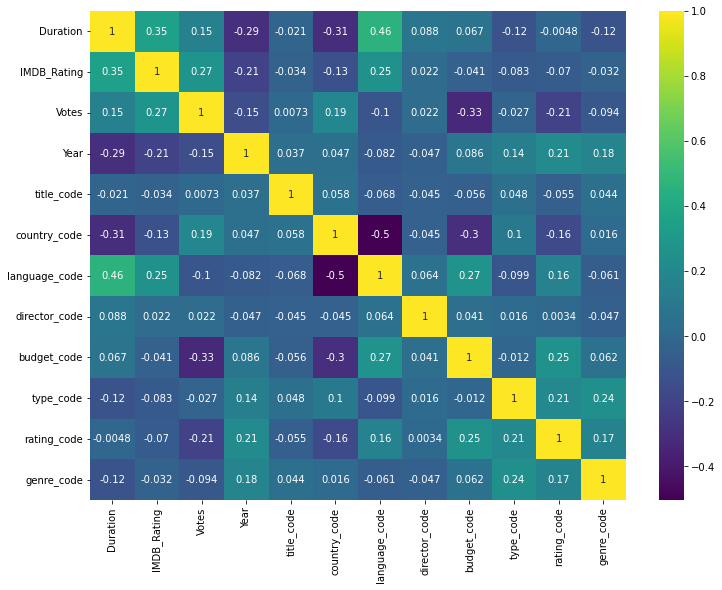

In [96]:
from matplotlib import cm 
plt.figure(figsize=(12, 9))
c = di.corr(method="pearson")
h = sns.heatmap(c, 
            xticklabels=c.columns.values,
            yticklabels=c.columns.values,cmap=cm.viridis,annot=True)

__Spearman's Correlation__

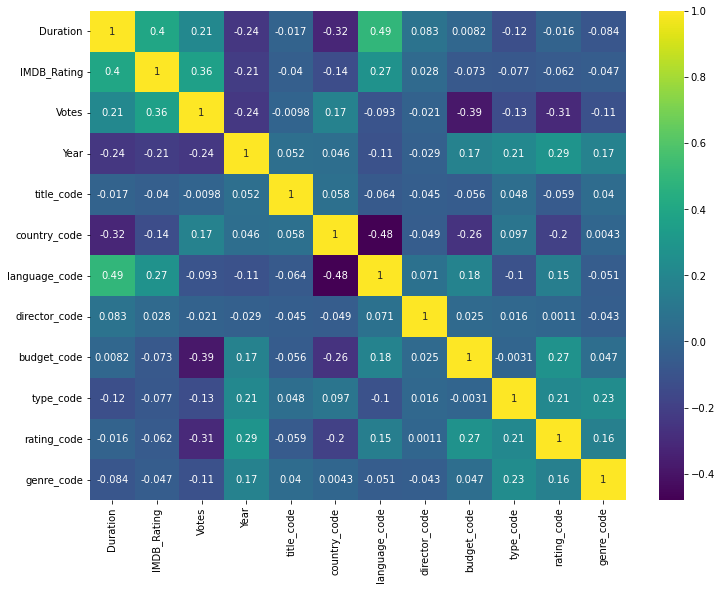

In [97]:
from matplotlib import cm 

plt.figure(figsize=(12, 9))
c = di.corr(method="spearman")
heat=sns.heatmap(c, 
            xticklabels=c.columns.values,
            yticklabels=c.columns.values,cmap=cm.viridis,annot=True)

>__Wordcloud__

In [98]:
pip install wordcloud==1.8.1

     |████████████████████████████████| 220 kB 2.7 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-macosx_10_9_x86_64.whl size=154110 sha256=71e88ff16d336f0f9cd5faed76196976d7e09b1470ad3437b49731e156f66c64
  Stored in directory: /Users/harinipopuri/Library/Caches/pip/wheels/f9/7a/dd/06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [123]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harinipopuri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [124]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harinipopuri/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [125]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


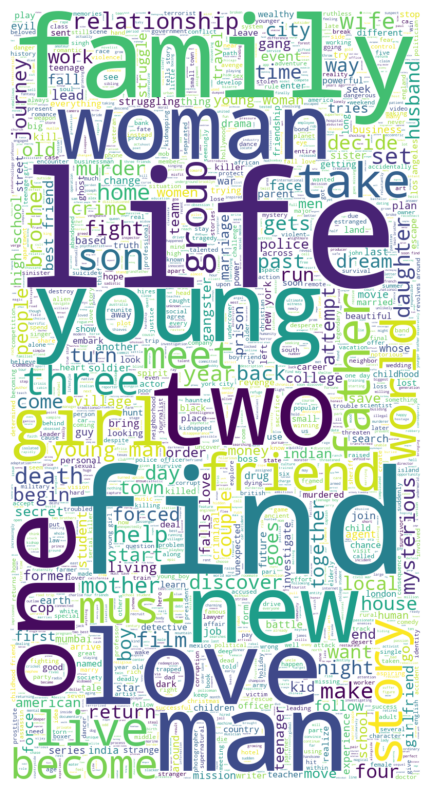

In [39]:

words = " ".join(combined_data['Description'])
#remove punctuation and stop words
def stop_punc(text):
    
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


wf = stop_punc(words)

text = " ".join([ele for ele in wf])


w_c= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500 )
w_c.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(w_c,interpolation="bilinear")
plt.axis('off')
plt.show()

# Models

### Unsupervised Models - Recommendation

In [126]:
mov = combined_data.copy()
mov["Genre"] =mov["Genre"].str.replace("&", "")
mov["Cast"] = mov["Cast"].str.replace(","," ")
mov["Genre"] =mov["Genre"].str.replace(",", "")

mov["Description"]
# removing non-alphanumeric chars
import re
def non_alpha(s):
      
      s = re.sub ('[\W]+', ' ', s.lower())
      return s

mov["Cast"] =mov["Cast"].apply(non_alpha)
mov["Description"]= mov["Description"].apply(non_alpha)
mov["Genre"]  = mov["Genre"].apply(non_alpha)

In [127]:

stop = stopwords.words('english')
#remove stop words
def stop_words(s):
      return " ".join([item for item in s.split() if item not in stop])

mov["Cast"] = mov["Cast"].apply(stop_words)
mov["Description"] = mov["Description"].apply(stop_words)
mov["Genre"] = mov["Genre"].apply(stop_words)

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

# creating the vectorizer
vect = CountVectorizer()

# extracting input and output
a = vect.fit_transform(mov["Cast"])
b = vect.fit_transform(mov["Description"])
c = vect.fit_transform(mov["Genre"])
print(a.shape)
print(b.shape)
print(c.shape)

(2349, 14783)
(2349, 9354)
(2349, 43)


In [141]:
df = mov.copy()
ab =pd.concat([df.reset_index(), pd.DataFrame(a.todense())],axis = 1)
bc = pd.concat([ab.reset_index(), pd.DataFrame(b.todense())],axis = 1)
cd = pd.concat([bc, pd.DataFrame(c.todense())],axis = 1)

fr =pd.merge(left=di, right=cd, left_on='Movie_Title', right_on='Movie_Title')
fr = fr.drop(["IMDB_Title_ID", "Duration_y", "Country", "Language", "Director", "Description", "IMDB_Rating_y", "Votes_y", "Budget","Type","Cast","Year_y","Rating","Genre","index","level_0"],axis = 1)
print(fr.head(2))



       Movie_Title  Duration_x  IMDB_Rating_x  Votes_x  Year_x  title_code  \
0  Sherlock Holmes         116            6.4      313    2009      1691.0   
1        Leap Year          56            6.1      268    2010      1065.0   

   country_code  language_code  director_code  budget_code  ...  33  34  35  \
0         268.0           22.0          185.0        288.0  ...   0   0   0   
1         268.0           22.0          752.0        288.0  ...   0   0   0   

   36  37  38  39  40  41  42  
0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0  

[2 rows x 24193 columns]


__K-means__

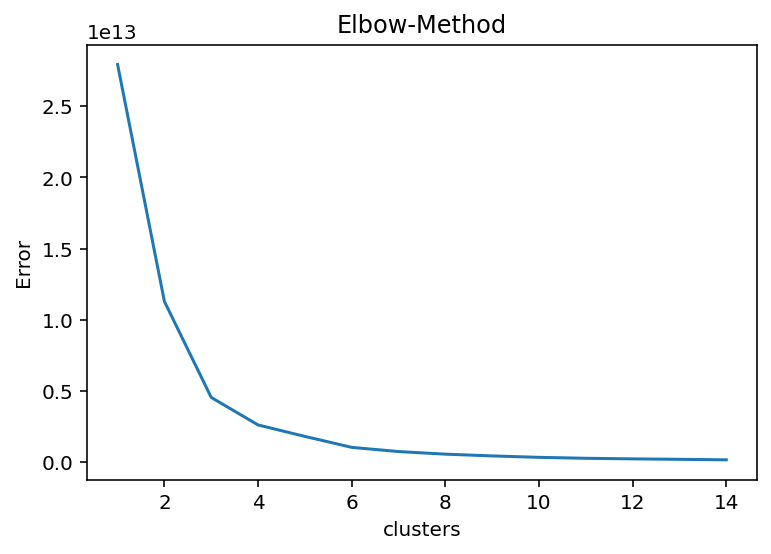

In [142]:
E=[]
from sklearn.cluster import KMeans
k_= fr.iloc[:, 1:24193].values

for i in range(1, 15):
    km = KMeans(n_clusters = i).fit(k_)
    km.fit(k_)
    E.append(km.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(1, 15), E)
plt.title('Elbow-Method')
plt.xlabel('clusters')
plt.ylabel('Error')
plt.show()

We utilized the k-means clustering algorithm and determined the optimal number of clusters as 10 through the elbow method. The result of the k-means clustering is represented by an array called 'y_kmeans10,' which assigns each film to its respective cluster.

In [132]:
x = di.iloc[:, 1:24193].values
km10 = KMeans(n_clusters=10)
ykm10 = km10.fit_predict(x)
centers = km10.cluster_centers_

ykm10

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

We conducted Principal Component Analysis (PCA) to reduce the dimensionality of the data, enabling us to visualize the outcomes of our k-means clustering on a 2D scatter plot. This approach allows for a more comprehensible representation of the clustering results.

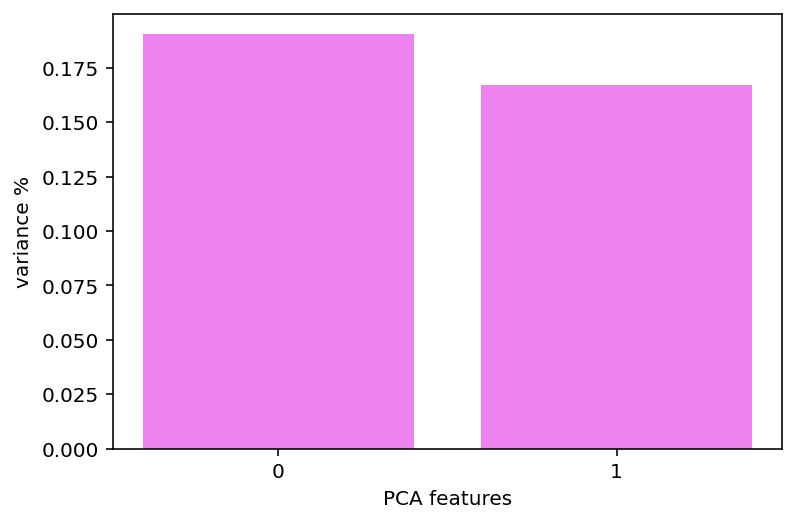

In [143]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
kx = di.iloc[:, 1:24193].values
kXstd = StandardScaler().fit_transform(kx)

# Create a PCA instance: pca
pca = PCA(n_components=2)
pri_Com = pca.fit_transform(kXstd)

# Plot the explained variances
fea = range(pca.n_components_)
plt.bar(fea, pca.explained_variance_ratio_, color='violet')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(fea)

# Save components to a DataFrame
PCAcomp = pd.DataFrame(pri_Com)

We used the principle components for visualizing our data in two dimension by scatter plot. At first look its hard to see all of the clusters but also some of them are distinguishable.

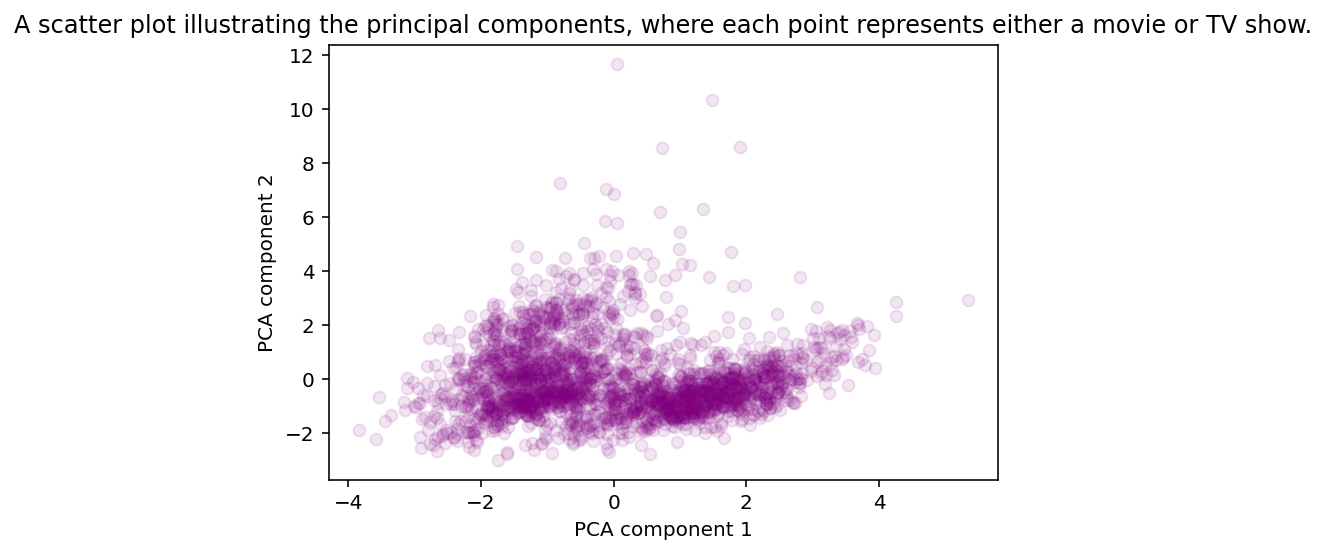

In [144]:
plt.scatter(PCAcomp[0], PCAcomp[1], alpha=.1, color='purple')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title("A scatter plot illustrating the principal components, where each point represents either a movie or TV show.")
plt.show()

We depicted the clusters on the scatter plot. The objective of the k-means clustering algorithm is to maximize the similarity within clusters while maximizing the separation between clusters. It achieves this by attempting to form clusters with similar data points and spherical separation. As a result, each color on the plot represents a distinct cluster, and each point corresponds to an individual movie or TV show.

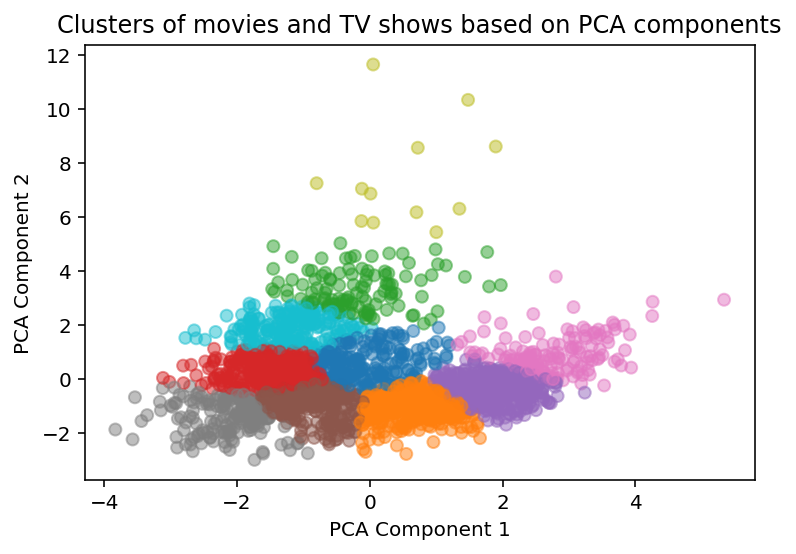

In [146]:
_x_ = PCAcomp.iloc[:, [0,1]].values
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(_x_)
kmeans10.cluster_centers_
plt.scatter(_x_[:,0], _x_[:,1], c=y_kmeans10, cmap='tab10', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("Clusters of movies and TV shows based on PCA components")
plt.show()

__Cosine Similarity__

In the cosine similarity calculation, we amalgamated information from 10 columns (Duration, Country, Language, Director, Description, IMDb Rating, Cast, Year, Rating, Genre) into a single column labeled "All Columns" for each row based on their Title. The objective was to create a unified representation, similar to a bag of words. To ensure accurate counting and prevent any influence on the results, we removed commas and dots. Additionally, we converted the IMDb Rating from a double to an integer type to enhance the performance of the similarity calculation.



In [147]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cr=combined_data.copy()

cr['Description']=cr['Description'].str.replace(',','').str.replace('.', '').str.lower()
cr['Cast']=cr['Cast'].str.replace(',','').str.replace('.', '').str.lower()
cr['Genre']=cr['Genre'].str.replace(',','').str.lower()
cr['Language']=cr['Language'].str.replace(',','')
cr['IMDB_Rating']=cr['IMDB_Rating'].astype(int)
cr['IMDB_Rating']=cr['IMDB_Rating'].astype(str)
cr['Year']=cr['Year'].astype(str)
cr['Duration']=cr['Duration'].astype(str)
cr['Rating']=cr['Rating'].astype(str)

def combine_columncontent(row):
    return row['Duration'] +  " " + row['Country'] + " " + row['Language'] + " " + row['Director'] + " " +row['Description']+ " " +row['IMDB_Rating']+ " " +row['Cast']+ " " +row['Year']+ " " +row['Rating']+ " " +row['Genre']       


cr['All Columns'] = cr.apply(combine_columncontent, axis=1)
count_mat = cv.fit_transform(cr['All Columns'])

cs = cosine_similarity(count_mat)
cr.head(2)

/var/folders/yf/mvjs6sv57jv92mt1v15d2msr0000gn/T/ipykernel_18266/508890460.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/var/folders/yf/mvjs6sv57jv92mt1v15d2msr0000gn/T/ipykernel_18266/508890460.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,IMDB_Title_ID,Movie_Title,Duration,Country,Language,Director,Description,IMDB_Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,All Columns
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,when a couple of swindlers hold young alice fa...,6,313,No Budget,Movie,robert downey jr jude law rachel mcadams mark ...,2009,PG-13,action & adventure comedies,116 USA English Arthur Berthelet when a couple...
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle",a young man heir to his misogynistic and milli...,6,268,No Budget,Movie,amy adams matthew goode adam scott john lithgo...,2010,PG,comedies romantic movies,"56 USA English James Cruze, Roscoe 'Fatty' Arb..."


Lets look our Similarity Matrix

In [148]:
cs

array([[1.        , 0.17868677, 0.16841558, ..., 0.07801081, 0.23723496,
        0.16372434],
       [0.17868677, 1.        , 0.21612702, ..., 0.08470927, 0.12122604,
        0.23704354],
       [0.16841558, 0.21612702, 1.        , ..., 0.09435642, 0.15191091,
        0.13201967],
       ...,
       [0.07801081, 0.08470927, 0.09435642, ..., 1.        , 0.06880209,
        0.01681682],
       [0.23723496, 0.12122604, 0.15191091, ..., 0.06880209, 1.        ,
        0.19553847],
       [0.16372434, 0.23704354, 0.13201967, ..., 0.01681682, 0.19553847,
        1.        ]])

Following this procedure, we will establish a series of titles with corresponding numerical indexes to align them with the similarity matrix. Subsequently, we will generate a score based on their similarity and arrange them in descending order from the most to the least similar. Additionally, we will exclude the first value in the similarity list to avoid recommending the same content as the user input. Consequently, when given a movie or TV show title as input, the system will provide recommendations for the top 5 most similar ones based on the features we incorporated earlier (all columns).

In [149]:
features = cr[['Movie_Title']].reset_index()

def film_recommend(movie): 
    
    ct = features[features['Movie_Title'] == movie].index[0] 
    features.sort_index(inplace=True)
    
    siscores = pd.Series(cs[ct]).sort_values(ascending=False) 
  
    simcont = pd.DataFrame({ 'Score' : siscores[1:100]}).reset_index() 
    simcont = simcont.merge(features) 
    simcont= simcont[['Movie_Title','Score']] 
    
    return simcont

In [152]:
film_recommend('Godzilla').head(5)

,Movie_Title,Score
0,Beyond Evil,0.342498
1,One Day,0.280386
2,Yellowbird,0.260208
3,Victor,0.259828
4,Kingpin,0.257248


# Supervised Models

###  Classification Models
##### Random Forest Classification

In classification tasks, we opt to predict labels based on IMDb ratings. However, since classification deals with discrete values, we categorize IMDb ratings into four distinct groups for prediction.

In [153]:
lablist = []
for j in range(len(combined_data)):
  if combined_data.iloc[j,7] <= 5.0:
    lablist.append(int(0))
  elif combined_data.iloc[j,7] > 5.0 and combined_data.iloc[j,7] <=7.0:
    lablist.append(int(1))
  elif combined_data.iloc[j,7] > 7.0 and combined_data.iloc[j,7] < 8.0:
    lablist.append(int(2))
  elif combined_data.iloc[j,7] >= 8.0 and combined_data.iloc[j,7] <=10.0:
    lablist.append(int(3))

dilabel = di.copy()
dilabel['IMDB_label'] = lablist

Once we've established our discrete IMDb rating labels, we proceeded with Random Forest Classification.

In [154]:
dilabel.head()

,Movie_Title,Duration,IMDB_Rating,Votes,Year,title_code,country_code,language_code,director_code,budget_code,type_code,rating_code,genre_code,IMDB_label
0,Sherlock Holmes,116,6.4,313,2009,1691.0,268.0,22.0,185.0,288.0,0.0,5.0,10.0,1
5,Leap Year,56,6.1,268,2010,1065.0,268.0,22.0,752.0,288.0,0.0,4.0,133.0,1
7,The Trap,60,6.0,118,2017,2105.0,268.0,22.0,1549.0,288.0,0.0,9.0,99.0,1
14,The Circle,71,6.3,491,2021,1907.0,268.0,22.0,584.0,288.0,1.0,9.0,253.0,1
18,The Monster,86,6.2,906,2016,2037.0,268.0,22.0,1569.0,288.0,0.0,6.0,200.0,1


In [155]:
X_ = dilabel.iloc[:,[1,3,4,5,6,7,8,9,10,11,12]].values
Y_ = dilabel.iloc[:, 13].values

In the below two cells, data was splitted into testing and training data. Then, implement Random Forest Classifier.



In [156]:
from sklearn.model_selection import train_test_split

diXtrain, diXtest, diytrain, diytest = train_test_split(X_, Y_)

In [157]:
from sklearn.ensemble import RandomForestClassifier

randfc = RandomForestClassifier(n_estimators=100, random_state=42)
randfc.fit(diXtrain, diytrain)

RandomForestClassifier(random_state=42)

In [158]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

ypredtest = randfc.predict(diXtest)

print('Test Confusion Matrix: ')
print(confusion_matrix(diytest, ypredtest))

print('')

print('Test Classification report:')
print(classification_report(diytest, ypredtest))

randfc_acc = accuracy_score(diytest, ypredtest)
print("Accuracy with Random Forest :"+str(randfc_acc))

Test Confusion Matrix: 
[[ 39  90   0   0]
 [ 25 312   7   0]
 [  2  71  18   0]
 [  1  14   7   2]]

Test Classification report:
              precision    recall  f1-score   support

           0       0.58      0.30      0.40       129
           1       0.64      0.91      0.75       344
           2       0.56      0.20      0.29        91
           3       1.00      0.08      0.15        24

    accuracy                           0.63       588
   macro avg       0.70      0.37      0.40       588
weighted avg       0.63      0.63      0.58       588

Accuracy with Random Forest :0.6309523809523809


Above cell you can see the results after using  Random Forest Classifier on the test data. Accuracy is about __0.64__.

To improve our algorithm's performance and accuracy, we adopted various strategies. These methods included adjusting hyperparameters finely and utilizing essential features to optimize outcomes.

[('Duration', 0.192), ('Movie_Title', 0.133), ('Votes', 0.12), ('type_code', 0.113), ('country_code', 0.112), ('IMDB_Rating', 0.087), ('title_code', 0.079), ('Year', 0.059), ('language_code', 0.051), ('budget_code', 0.046), ('director_code', 0.008)]
Feature: Duration   Importance: 0.192
Feature: Movie_Title   Importance: 0.133
Feature: Votes   Importance: 0.12
Feature: type_code   Importance: 0.113
Feature: country_code   Importance: 0.112
Feature: IMDB_Rating   Importance: 0.087
Feature: title_code   Importance: 0.079
Feature: Year   Importance: 0.059
Feature: language_code   Importance: 0.051
Feature: budget_code   Importance: 0.046
Feature: director_code   Importance: 0.008


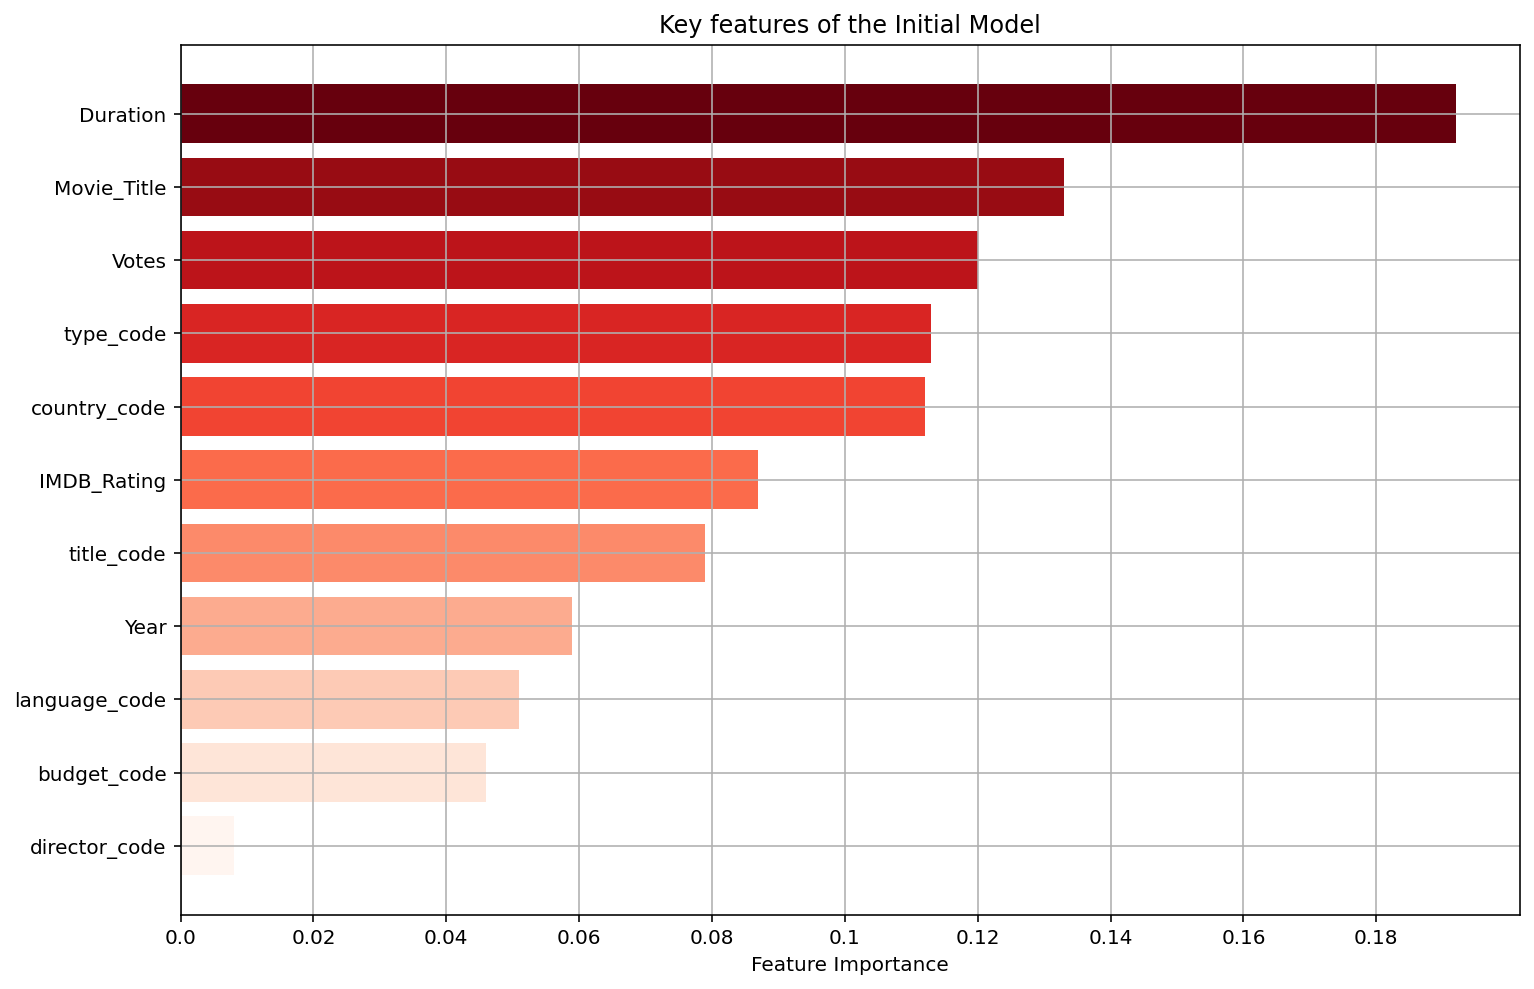

In [159]:
from matplotlib import cm

flist = dilabel.columns
imps = list(randfc.feature_importances_)
feature_importance = [(feature, round(importance, 3)) for feature, importance in zip(flist, imps)]
fimps = sorted(feature_importance, key = lambda x: x[1], reverse = True)
print(fimps)

for pair in fimps[:25]:
      print("Feature: {:2}   Importance: {}".format(*pair))
feat = fimps[:25]

listt = []
for i in range(len(feat)):
      listt.append(feat[i][0])

imp = []
for i in range(len(feat)):
      imp.append(feat[i][1])

listtt=np.arange(start=0,stop=0.183,step=0.02)
c = plt.cm.Reds_r(np.linspace(0,1,len(feat)))
fig, ax =plt.subplots(figsize=(12,8))
ax.set_xticks(listtt)
ax.set_xticklabels(listtt)
ax.invert_yaxis()
plt.barh(listt,imp,color=c)
#plt.grid()
ax.grid(zorder=0)
plt.title('Key features of the Initial Model')
plt.xlabel('Feature Importance')
plt.show()



In [160]:
from sklearn.model_selection import GridSearchCV

pg = {'criterion' :['entropy'],'min_samples_split': [2,5,10],'n_estimators': [100, 200, 300, 400, 600]}
rg = GridSearchCV(estimator=randfc, param_grid=pg, cv= 5)
rg.fit(diXtrain, diytrain)

rg.best_params_
grid_preds = rg.predict(diXtest)
hacc = accuracy_score(diytest, grid_preds)
hacc

0.6445578231292517

In here, we used the dataframe "fr" which is contructed by implementation of counter vectorizer and this dataframe includes Genre, Cast and Description features too.

In [161]:
fr['IMDB_label'] = lablist

diXX = fr.iloc[:, 1:24194].values
diyy = fr.iloc[:, 24193].values

In [162]:
diXtr, diXte, diytr, diyte = train_test_split(diXX, diyy)

In [163]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(diXtr, diytr)
diypredtest = rfc.predict(diXte)

In [164]:
print('Test Confusion Matrix: ')
print(confusion_matrix(diyte, diypredtest))
print('')
print('')
print('Test Classification report:')
print(classification_report(diyte, diypredtest))

rf_acc_cv = accuracy_score(diyte, diypredtest)

Test Confusion Matrix: 
[[133   0   0   0]
 [  0 350   0   0]
 [  0  12  71   0]
 [  0   6  16   0]]


Test Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       0.95      1.00      0.97       350
           2       0.82      0.86      0.84        83
           3       0.00      0.00      0.00        22

    accuracy                           0.94       588
   macro avg       0.69      0.71      0.70       588
weighted avg       0.91      0.94      0.92       588



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [167]:
from sklearn.model_selection import GridSearchCV
param_gridd = {'criterion' :['entropy'],'min_samples_split': [2,5,10],'n_estimators': [100, 200, 300, 400, 600]}
rf_gridd = GridSearchCV(estimator=rfc, param_grid=param_gridd, cv= 5)
rf_gridd.fit(diXtr, diytr)
rf_gridd.best_params_
grid_predss = rf_gridd.predict(diXte)
a_hyper_param = accuracy_score(diyte, grid_predss)
print(a_hyper_param)

0.8928571428571429


In [166]:
print("Random Forest Accuracy:"+str(rf_acc_cv))

Random Forest Accuracy:0.9421768707482994


### KNN

We categorize the IMDb ratings as the "label" in our machine learning approach.

- Classification is based on IMDb Ratings.
- Ratings below 5 are labeled as "bad" for movies/TV series.
- Ratings between 5 and 7 are categorized as "normal" for movies/TV series.
- Ratings between 7 and 8 are deemed as "good" for movies/TV series.
- Ratings between 8 and 10 are classified as "legendary" for movies/TV series.

In [168]:
def ımdbclasification(vr):
    if  vr <= 5.0:
          return 0
    elif vr > 5.0 and vr <= 7.0:
          return 1;
    elif vr > 7.0 and vr < 8.0:
          return 2;
    elif vr >= 8.0 and vr <= 10.0:
          return 3;
combined_data["label"] = combined_data["IMDB_Rating"].apply(ımdbclasification)
combined_data.head(5)

,IMDB_Title_ID,Movie_Title,Duration,Country,Language,Director,Description,IMDB_Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,label
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies",1
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies",1
7,tt0013704,The Trap,60,USA,English,Robert Thornby,A miner's happiness is destroyed when a rival ...,6.0,118,No Budget,Movie,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",2017,TV-MA,Comedies,1
14,tt0015684,The Circle,71,USA,English,Frank Borzage,"Elizabeth Cheney has a wealthy husband, social...",6.3,491,No Budget,TV Show,Michelle Buteau,2021,TV-MA,Reality TV,1
18,tt0016123,The Monster,86,USA,English,Roland West,A meek clerk who doubles as an amateur detecti...,6.2,906,No Budget,Movie,"Zoe Kazan, Ella Ballentine, Aaron Douglas, Chr...",2016,R,"Horror Movies, Independent Movies",1


In [170]:
contbad=0
contnor=0
contgood=0
contleg=0

for j in combined_data.index:
    if combined_data["label"][j]==0:
        contbad=contbad+1
    elif combined_data["label"][j]==1:
        contnor=contnor+1    
    elif combined_data["label"][j]==2:
        contgood=contgood+1
    elif combined_data["label"][j]==3:  
        contleg=contleg+1
  
    i=i+1
    
print("Bad movies/TV shows in netflix: ",contbad)  
print("Normal movies/TV shows in netflix: ",contnor)  
print("Good movies/TV shows in netflix: ",contgood)  
print("Legendary movies/TV shows in netflix: ",contleg)  

Bad movies/TV shows in netflix:  516
Normal movies/TV shows in netflix:  1374
Good movies/TV shows in netflix:  368
Legendary movies/TV shows in netflix:  91


Here's a paraphrased version:

- A new classification system based on the production years is being introduced:
  - Films or TV series made prior to the 1950s will be labeled as "too old."
  - Creations from the 1950s to the 1980s will fall under the "old" category.
  - Works produced during the 1980s to the 2000s will also be considered "old," albeit to a lesser extent.
  - Productions between the 2000s and 2020s will be recognized as "new."

In [171]:
def clf_year(vr):
    if  vr <= 1950:
          return 0
    elif vr > 1950 and vr <= 1980:
          return 1;
    elif vr > 1980 and vr < 2000:
          return 2;
    elif vr >= 2000 and vr <= 2020:
          return 3;
        
#data["year"].astype(int)
combined_data["year_classification"] = combined_data["Year"].apply(clf_year)

We divided the content into segments according to their duration:
- Content lasting less than 60 minutes is classified as short films or TV series.
- Creations with durations ranging from 60 to 120 minutes are categorized as standard-length films or TV series.
- Productions lasting more than 2 hours are labeled as long-length films or TV series.

In [172]:
def dclf(vr):
    if  vr <= 60:
          return 0
    elif vr > 60 and vr <= 120:
          return 1;
    elif vr > 120 :
          return 2;
    
#data["year"].astype(int)
combined_data["duration_classification"] = combined_data["Duration"].apply(dclf)
combined_data.head(2)


,IMDB_Title_ID,Movie_Title,Duration,Country,Language,Director,Description,IMDB_Rating,Votes,Budget,Type,Cast,Year,Rating,Genre,label,year_classification,duration_classification
0,tt0007338,Sherlock Holmes,116,USA,English,Arthur Berthelet,When a couple of swindlers hold young Alice Fa...,6.4,313,No Budget,Movie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...",2009,PG-13,"Action & Adventure, Comedies",1,3.0,1
5,tt0012382,Leap Year,56,USA,English,"James Cruze, Roscoe 'Fatty' Arbuckle","A young man, heir to his misogynistic and mill...",6.1,268,No Budget,Movie,"Amy Adams, Matthew Goode, Adam Scott, John Lit...",2010,PG,"Comedies, Romantic Movies",1,3.0,0


Grouping Votes for Films and Series:
- Films or series with less than 1000 votes are categorized as having low voter engagement.
- Productions receiving votes between 1000 and 5000 are placed in the medium-voted segment.
- Works accumulating votes from 5000 to 10000 are regarded as nearing the high-voted threshold but remain within the medium category.
- Any film or series gathering over 10,000 votes is acknowledged as highly popular among viewers.

In [173]:
def votes(vr):
    if vr <= 1000:
        return 0
    elif vr > 1000 and vr <= 5000:
        return 1;
    elif vr > 5000 and vr <= 10000:
        return 2;
    else :
        return 3
    
combined_data["votes_class"] = combined_data["Votes"].apply(votes)
combined_data["votes_class"]

0       0
5       0
7       0
14      0
18      0
       ..
2955    0
2956    1
2957    1
2958    0
2959    3
Name: votes_class, Length: 2349, dtype: int64

In [174]:
di.head()

,Movie_Title,Duration,IMDB_Rating,Votes,Year,title_code,country_code,language_code,director_code,budget_code,type_code,rating_code,genre_code
0,Sherlock Holmes,116,6.4,313,2009,1691.0,268.0,22.0,185.0,288.0,0.0,5.0,10.0
5,Leap Year,56,6.1,268,2010,1065.0,268.0,22.0,752.0,288.0,0.0,4.0,133.0
7,The Trap,60,6.0,118,2017,2105.0,268.0,22.0,1549.0,288.0,0.0,9.0,99.0
14,The Circle,71,6.3,491,2021,1907.0,268.0,22.0,584.0,288.0,1.0,9.0,253.0
18,The Monster,86,6.2,906,2016,2037.0,268.0,22.0,1569.0,288.0,0.0,6.0,200.0


In [175]:
#All information we need to have in order to use Knn 
# This contains for each movies, classfication for each column
print(combined_data.columns)
an = di.copy()

an["votes_class"] =combined_data["votes_class"]
an["label"] = combined_data["label"]
an["duration_class"] = combined_data["duration_classification"]
an["year_class"] =combined_data["year_classification"]
an

an.drop("Duration",axis = 1,inplace = True)
an.drop("Votes",axis = 1,inplace = True)
an.drop("Year",axis = 1,inplace = True)
an.head()

Index(['IMDB_Title_ID', 'Movie_Title', 'Duration', 'Country', 'Language',
       'Director', 'Description', 'IMDB_Rating', 'Votes', 'Budget', 'Type',
       'Cast', 'Year', 'Rating', 'Genre', 'label', 'year_classification',
       'duration_classification', 'votes_class'],
      dtype='object')


,Movie_Title,IMDB_Rating,title_code,country_code,language_code,director_code,budget_code,type_code,rating_code,genre_code,votes_class,label,duration_class,year_class
0,Sherlock Holmes,6.4,1691.0,268.0,22.0,185.0,288.0,0.0,5.0,10.0,0,1,1,3.0
5,Leap Year,6.1,1065.0,268.0,22.0,752.0,288.0,0.0,4.0,133.0,0,1,0,3.0
7,The Trap,6.0,2105.0,268.0,22.0,1549.0,288.0,0.0,9.0,99.0,0,1,0,3.0
14,The Circle,6.3,1907.0,268.0,22.0,584.0,288.0,1.0,9.0,253.0,0,1,1,NaN
18,The Monster,6.2,2037.0,268.0,22.0,1569.0,288.0,0.0,6.0,200.0,0,1,1,3.0


To analyze string values like Genre, Cast, and Description within the data, we employ logistic regression and leverage the counter vectorizer as a valuable tool.

In [176]:
movi = combined_data.copy()

movi["Genre"] =movi["Genre"].str.replace(",", "")
movi["Genre"] =movi["Genre"].str.replace("&", "")

movi["Cast"] = movi["Cast"].str.replace(","," ")
movi["Description"]

0       When a couple of swindlers hold young Alice Fa...
5       A young man, heir to his misogynistic and mill...
7       A miner's happiness is destroyed when a rival ...
14      Elizabeth Cheney has a wealthy husband, social...
18      A meek clerk who doubles as an amateur detecti...
                              ...                        
2955    Jai Mummy Di is a light-hearted family comedy ...
2956    A young girl is drawn into a mystery involving...
2957    When a young man becomes possessed after playi...
2958    Set 25 years after, Jack is now working as a S...
2959    Twelve-year-old Kareem Manning hires a crimina...
Name: Description, Length: 2349, dtype: object

This function eliminates any non-alphanumeric characters present in the given string.



In [177]:
import re

def non_alpha(s):
  # removing non-alphanumeric chars
  s = re.sub ('[\W]+', ' ', s.lower())

  return s

In [178]:
movi["Cast"] =movi["Cast"].apply(non_alpha)
movi["Description"]= movi["Description"].apply(non_alpha)
movi["Genre"]  = movi["Genre"].apply(non_alpha)

This function remove the most common word in given dataset



In [179]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harinipopuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
def stop_words(s):
    return " ".join([item for item in s.split() if item not in stop])

In [181]:
movi["Cast"] = movi["Cast"].apply(stop_words)
movi["Description"] = movi["Description"].apply(stop_words)
movi["Genre"] = movi["Genre"].apply(stop_words)

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

# creating the vectorizer
vect = CountVectorizer()

# extracting input and output
X = vect.fit_transform(movies["Cast"])
X_a = vect.fit_transform(movies["Description"])
X_b = vect.fit_transform(movies["Genre"])

Merge the previous data which is contains integer values both obtain from classification and encoding, with the new counter vectorizer



In [183]:
dfc = movi.copy()
ab =pd.concat([dfc.reset_index(), pd.DataFrame(X.todense())],axis = 1)
bc = pd.concat([ab.reset_index(), pd.DataFrame(X_a.todense())],axis = 1)
cd = pd.concat([bc, pd.DataFrame(X_b.todense())],axis = 1)

frame =pd.merge(left=an, right=cd, left_on='Movie_Title', right_on='Movie_Title')
frame.head(2)

,Movie_Title,IMDB_Rating_x,title_code,country_code,language_code,director_code,budget_code,type_code,rating_code,genre_code,...,19,20,21,22,23,24,25,26,27,28
0,Sherlock Holmes,6.4,1691.0,268.0,22.0,185.0,288.0,0.0,5.0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Leap Year,6.1,1065.0,268.0,22.0,752.0,288.0,0.0,4.0,133.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now named "frame" contains all of the values we need to use in machine learning, but first we need to drop unnecesary columns from it



In [184]:
frame =frame.drop(["Movie_Title","IMDB_Rating_x","index","IMDB_Title_ID","Duration","Country","Language","Director","Description","IMDB_Rating_y","Votes","Budget","Type","Cast","Year","Rating","Genre"],axis = 1)


In [185]:
frame = frame.drop(["label_x","level_0","label_y","votes_class_y","duration_classification","year_classification"],axis = 1)


Now we are ready to use this values in our Machine Learning model



In [186]:
frame.replace({np.NAN:0,np.inf:0},inplace=True)

In [187]:
dx = frame.values  
dy = an["label"].values

In [188]:
# 80% for training and 20% for testing-validation
dxtr, dxrem, dytr, dyrem = train_test_split(dx, dy, test_size=0.20, random_state=42)
# 10% validation, 10% test
dxte, dxval, dyte, dyval = train_test_split(dxrem, dyrem, test_size=0.50, random_state=42)

In [189]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
Kr = np.arange(1, 50)
al = []

for k in Kr:
    # create a new model with current K
    knn = KNeighborsClassifier(k, metric="euclidean")
    # fit training data
    knn.fit(dxtr, dytr)
    # predict the validation data
    ypred = knn.predict(dxval)
    # obtain the accuracy value
    ac = accuracy_score(dyval, ypred)
    al.append(ac)

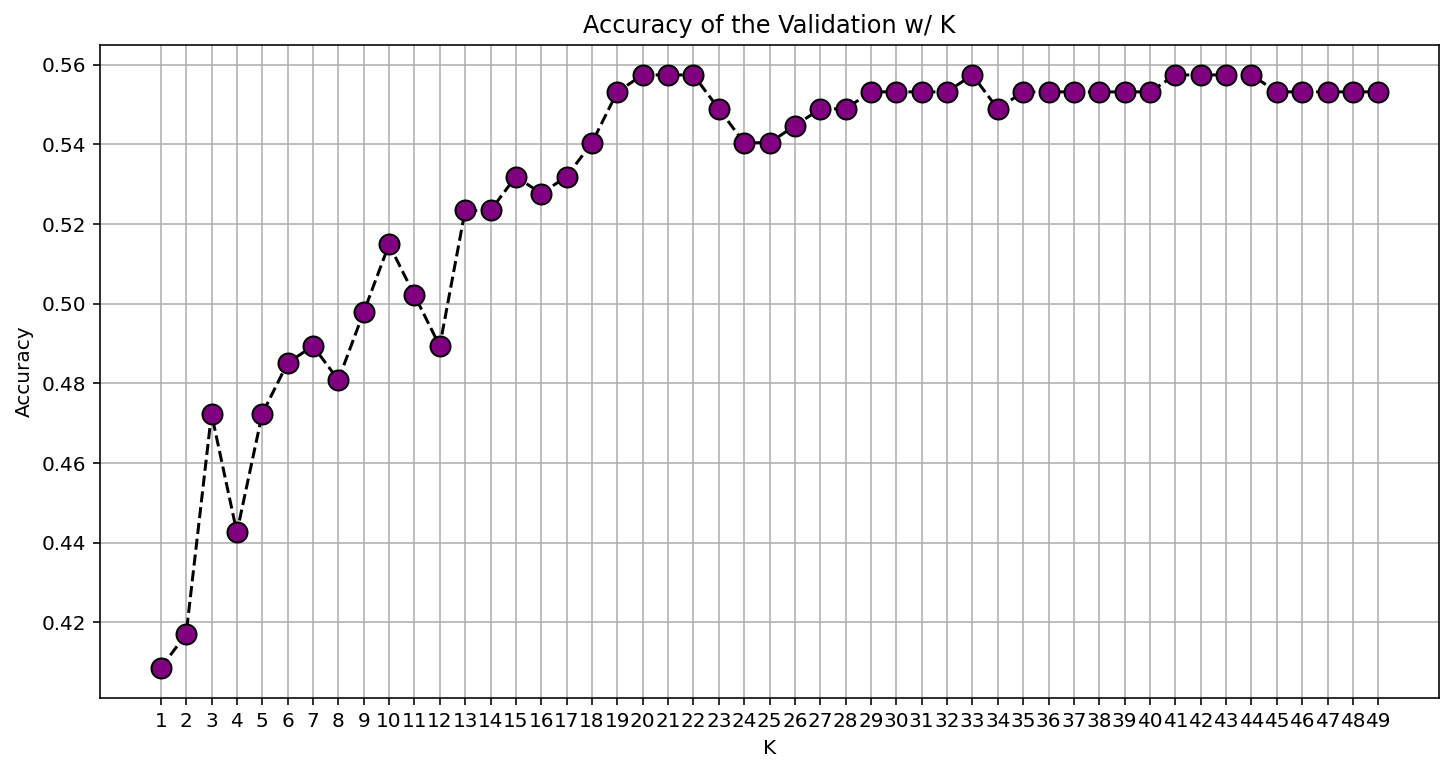

In [190]:
plt.figure(figsize=(12, 6))  
plt.plot(Kr, al, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='purple', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(Kr)
plt.grid()
plt.show()

We see that when k value is incresing from 1 to 17 there is great impact on the accuracy score since we increase the number of neighbor, there is more chance to evaluate more precisely. After 17 still it goes arround similar accuraccy but after certain point it goes as linearly in the K value of 43.

In [192]:
knnModel = KNeighborsClassifier(43, metric="euclidean")
knnModel.fit(dxtr, dytr)
ypred = knnModel.predict(dxte)
knn_score = accuracy_score(dyte, ypred)
print(knn_score)

0.5446808510638298


###### 

## Regression Models
#### Linear Regression

### Logistic Regression and Counter Vectorizer

In [193]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data=di
rX = data[['Votes','Duration','budget_code']]

 
ry = data['IMDB_Rating']

In [195]:
#creating test,train variables
from sklearn.model_selection import train_test_split
rXtr, rXte, rytr, ryte= train_test_split(rX, ry, test_size=0.2, random_state=1)

In [196]:
#use scikit learn to import the linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(rXtr, rytr)

LinearRegression()

In [197]:
#finds the best value for the intercept and slope, which results in a line that best fits the data,To retrieve the intercept:
print(reg.intercept_)

3.940766751297841


In [198]:
#coefficient represent y-intercept and slope of regression line respectively. The bigger the coefficient the correlation between our dependent and independent varibale is higher. As a result IMdb Rating has a higher correlation with duration.Has less interconnection with votes.

ce = pd.DataFrame(reg.coef_, rX.columns, columns=['Coefficient'])
ce

,Coefficient
Votes,0.000003
Duration,0.016971
budget_code,0.000263


In [199]:
y_pred = reg.predict(rXte)

In [200]:
df1 = pd.DataFrame({'Actual': ryte, 'Predicted': y_pred})
df1

,Actual,Predicted
1334,7.9,6.478898
1114,6.4,6.708406
2298,7.0,6.088009
565,6.7,6.954434
552,7.3,5.956959
...,...,...
942,5.8,5.984774
2881,4.1,5.562559
1989,5.1,5.680091
805,8.0,6.458076


In [218]:
#evaluate the performance of the algorithm
from sklearn import metrics
print('For Linear Regression:')
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(ryte, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ryte, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ryte, y_pred)))

For Linear Regression:
Mean Absolute Error(MAE): 1.2352127659574468
Mean Squared Error (MSE): 2.534547872340426
Root Mean Squared Error (RMSE): 1.5920263415975333


In [202]:
MeanAbsoluteError = metrics.mean_absolute_error(ryte, y_pred)
MeanSquaredError = metrics.mean_squared_error(ryte, y_pred)
RootMeanSquaredError = np.sqrt(mean_squared_error(ryte, y_pred))

###### 

#### Random Forest Regression


In [203]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(rXtr, rytr)

RandomForestRegressor()

In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = rf.predict(rXte)

rfmse = mean_squared_error(ryte, y_pred)
rfmae = mean_absolute_error(ryte, y_pred)
rfrmse = np.sqrt(rfmse)

print('Random Forest Regression :')
print("Mean Absolute Error (MAE): {}".format(rfmae))
print("Mean Squared Error (MSE): {}".format(rfmse))
print("Root Mean Squared Error (RMSE): {}".format(rfrmse))

Random Forest Regression :
Mean Absolute Error (MAE): 0.9454749999999997
Mean Squared Error (MSE): 1.4912083407700942
Root Mean Squared Error (RMSE): 1.2211504169307295


#### kNN Regression

In [205]:
from sklearn.neighbors import KNeighborsRegressor

Kr = np.arange(1, 40)
ev = []

for k in Kr:
    knn = KNeighborsRegressor(k)
    knn.fit(rXtr, rytr)
    y_pred = knn.predict(rXte)
    er = mean_squared_error(ryte, y_pred)
    ev.append(er)

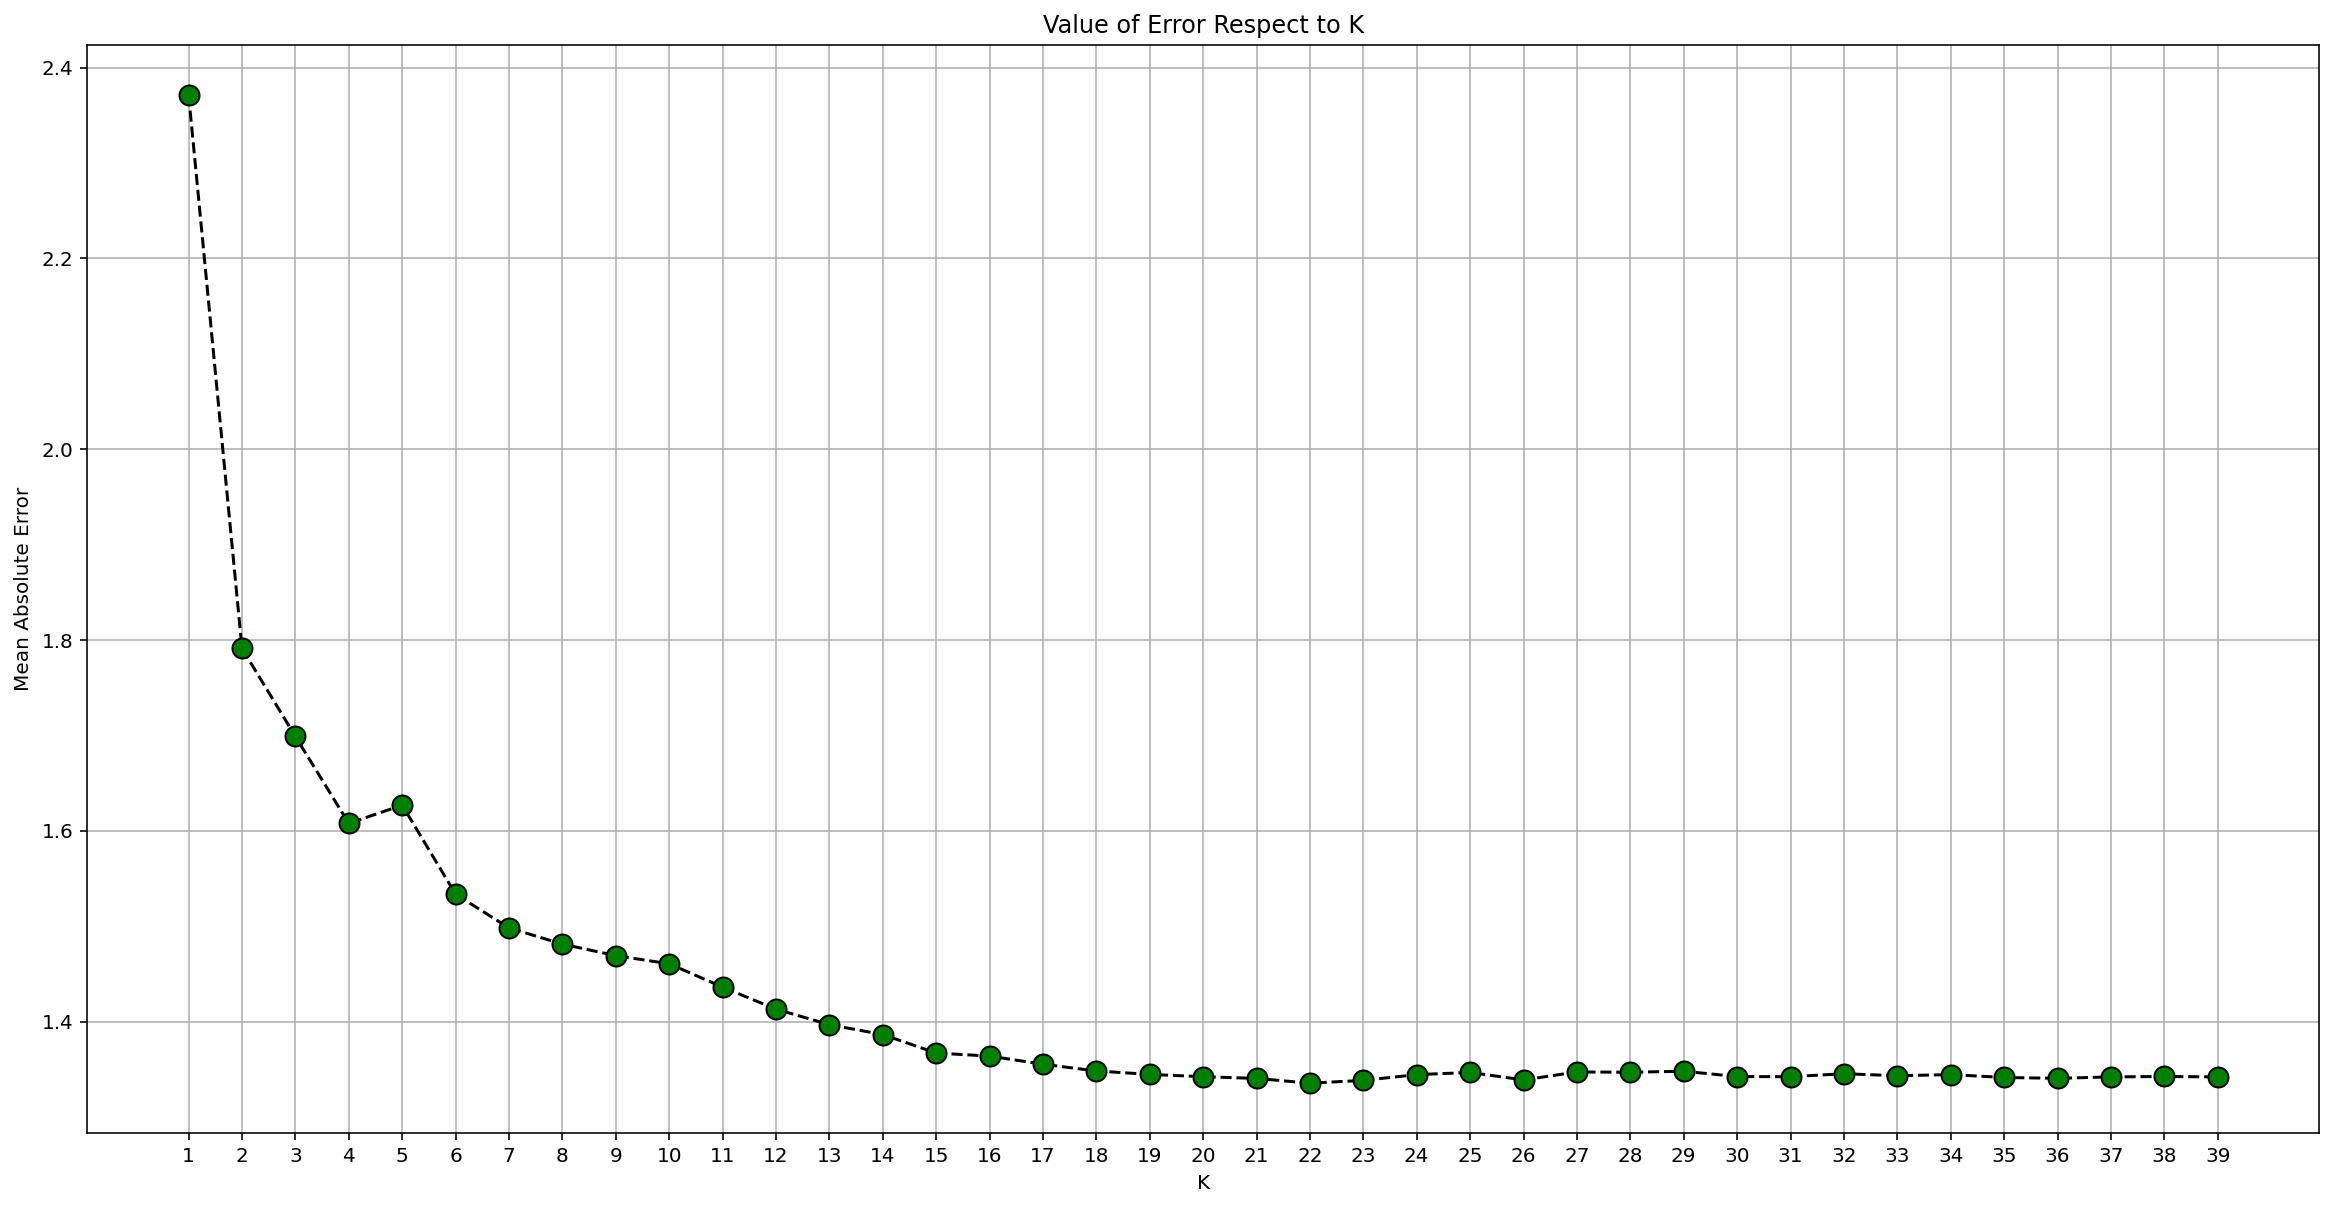

In [206]:
plt.figure(figsize=(20, 10))  
plt.plot(Kr, ev, color='black', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Value of Error Respect to K')  
plt.xlabel('K')  
plt.ylabel('Mean Absolute Error')
plt.xticks(Kr)
plt.grid()
plt.show()

After experimenting with different values of K in our model, we noticed that the error values stabilize and remain relatively constant after the K value surpasses 20. This suggests that increasing the K value further doesn't significantly improve the model's performance, as the error values remain close to those obtained at K=20. Despite this, we opted for a K value of 31 since it yielded the lowest error values among the tested values. Additionally, we observed that the plots for Mean Squared Error (MSE) and Square Mean Squared Error (SMSE) were quite similar, so we chose to display only one of them for clarity and representation.

In [207]:
knn = KNeighborsRegressor(31)
knn.fit(rXtr, rytr)

KNeighborsRegressor(n_neighbors=31)

In [220]:
y_pred = knn.predict(rXte)

kmse = mean_squared_error(ryte, y_pred)
kmae = mean_absolute_error(ryte, y_pred)
krmse = np.sqrt(kmse)

print('For KNN:')
print("Mean Absolute Error (MAE): {}".format(kmae))
print("Mean Squared Error (MSE): {}".format(kmse))
print("Root Mean Squared Error (RMSE): {}".format(krmse))

For KNN:
Mean Absolute Error (MAE): 0.9136650652024707
Mean Squared Error (MSE): 1.3424513250824717
Root Mean Squared Error (RMSE): 1.1586420176579442


#### Desicion Tree Regression


In [209]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(rXtr, rytr)

DecisionTreeRegressor()

In [221]:
y_pred = dt.predict(rXte)

dtmse = mean_squared_error(ryte, y_pred)
dtmae = mean_absolute_error(ryte, y_pred)
dtrmse = np.sqrt(dtmse)

print("For Decision Tree:")
print("Mean Absolute Error(MAE): {}".format(dtmae))
print("Mean Squared Error(MSE): {}".format(dtmse))
print("Root Mean Squared Error(RMSE): {}".format(dtrmse))

For Decision Tree:
Mean Absolute Error(MAE): 1.2352127659574468
Mean Squared Error(MSE): 2.534547872340426
Root Mean Squared Error(RMSE): 1.5920263415975333


Results showed that Desicion Tree Regression Model gave higher errors compare to Random Forest Regression Model 

### Results & Discussion
#### Accuracy comparison of classification models

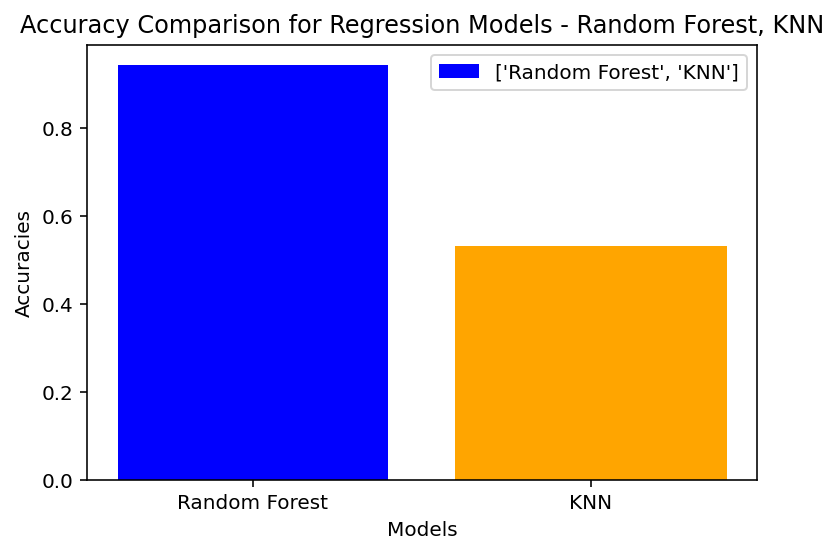

In [212]:
import matplotlib.pyplot as plt

# Plotting the bars
bars = plt.bar(["Random Forest", "KNN"], [rf_acc_cv, 0.53], label=["Random Forest", "KNN"], color=['blue', 'green'])

bars[1].set_color('orange')

plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison for Regression Models - Random Forest, KNN")
plt.legend()

# Displaying the plot
plt.show()


In our analysis comparing the classification performances of Random Forest and KNN methods, we observed similar accuracy values for both classifiers. While there was no notable difference in accuracy between the two, Random Forest Classifier demonstrated a slightly higher accuracy in label distinction.

###### 

#### Error comparison of regression models


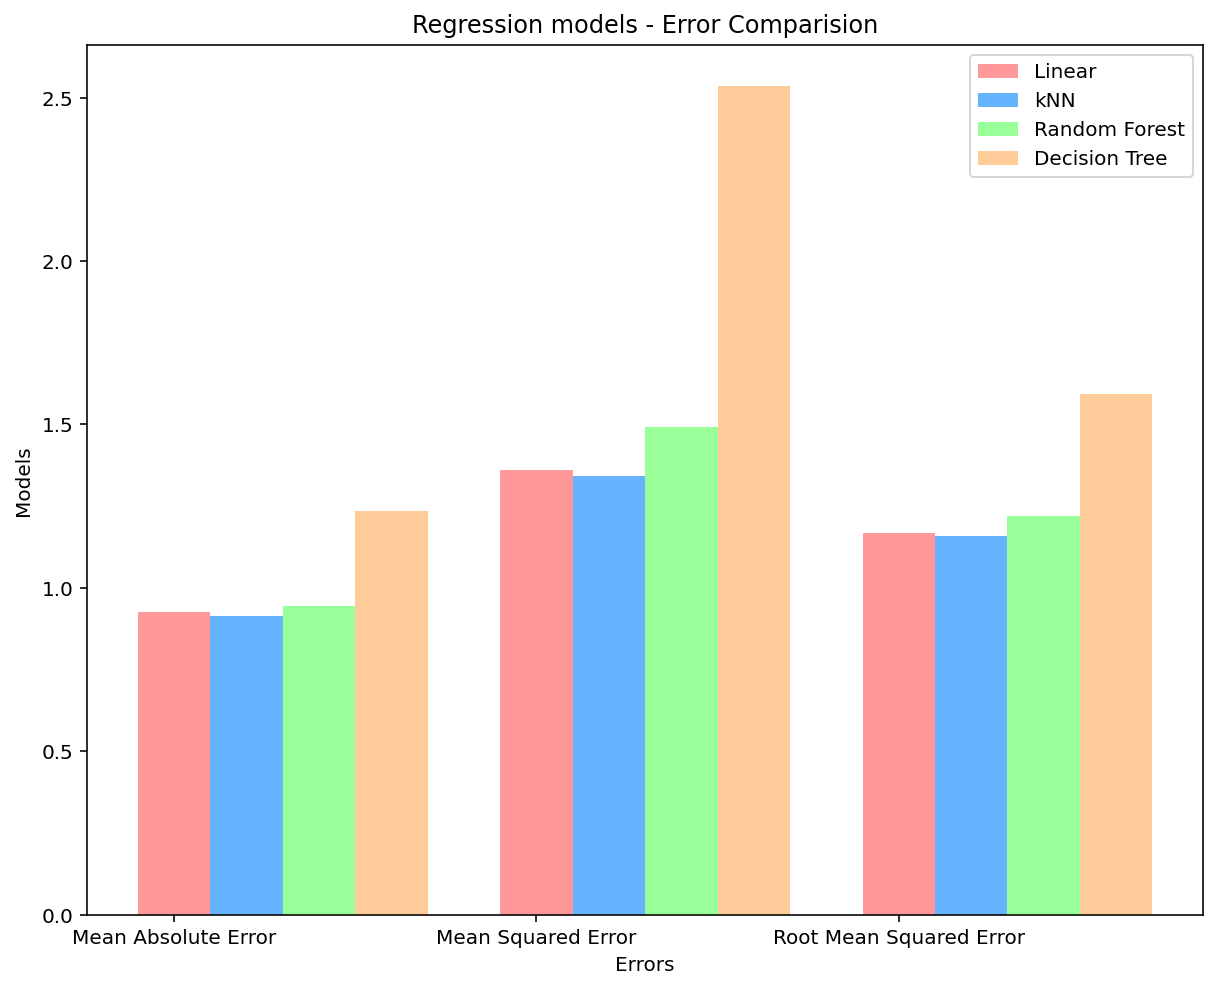

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Define the width and labels
w = 0.2
x = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error"]

# Define the data for each model
Linear = [MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError]
RandomF = [rfmae, rfmse, rfrmse]
kNN = [kmae, kmse, krmse]
DT = [dtmae, dtmse, dtrmse]

# Define custom colors for each model
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create bar positions
bar1 = np.arange(len(x))
bar2 = [i + w for i in bar1]
bar3 = [i + w for i in bar2]
bar4 = [i + w for i in bar3]

plt.figure(figsize=(10, 8))

# Plot bars with custom colors
plt.bar(bar1, Linear, w, label="Linear", color=colors[0])
plt.bar(bar2, kNN, w, label="kNN", color=colors[1])
plt.bar(bar3, RandomF, w, label="Random Forest", color=colors[2])
plt.bar(bar4, DT, w, label="Decision Tree", color=colors[3])

plt.xlabel("Errors")
plt.ylabel("Models")
plt.title("Regression models - Error Comparision")
plt.xticks(bar1, x)
plt.legend()
plt.show()


In [117]:
film_recommend('Victor').head()

,Movie_Title,Score
0,Two Lovers and a Bear,0.260208
1,Esperando la carroza,0.256100
2,Outlawed,0.233723
3,Santa Banta Pvt Ltd,0.224179
4,The Package,0.224179


Based on the outcomes derived from the applied algorithms referenced earlier, it appears that both the movie recommendation and IMDb prediction systems are functioning to a certain degree.